# TP2: Regresión del valor de valor medio de casas en distritos de California (17Co2024)


## Integrantes

- Adassus, Luciano
- de Pedro Mermier, Ignacio
- Perez, José

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

# California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

In [56]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [57]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [58]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [59]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Se separa el dataset en entrenamiento y evaluación

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [61]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

In [62]:
X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


Aquí se muestra un ejemplo de validación cruzada.

- Usamos método de 5-folds
- Usamos el MSE. [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) usa el valor negativo por motivos de simplificar el funcionamiento de otras funciones de la libreria.

In [63]:
# Creamos un modelo
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Este la forma que se implementa en scikit-learn
cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

# Este calculo nos devuelve el valor de MSE para cada una de los folds
cv

array([-0.54786366, -0.5008472 , -0.52047089, -0.51611229, -0.54882174])

In [64]:
# Podemos obtener el valor medio y desvio estandar de cada caso:
print(f"La media del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {(-1)*cv.mean()}")
print(f"El desvío estándar del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {cv.std()}")

La media del MSE en 5-fold CV para la regresión Ridge con alpha=1.0 es 0.5268231539349314
El desvío estándar del MSE en 5-fold CV para la regresión Ridge con alpha=1.0 es 0.018742809748334498


In [65]:
# Acá generamos varios valores de alpha para la búsqueda pedida en el TP.

In [66]:
alpha_values = np.linspace(0, 12.5, 100)
alpha_values

array([ 0.        ,  0.12626263,  0.25252525,  0.37878788,  0.50505051,
        0.63131313,  0.75757576,  0.88383838,  1.01010101,  1.13636364,
        1.26262626,  1.38888889,  1.51515152,  1.64141414,  1.76767677,
        1.89393939,  2.02020202,  2.14646465,  2.27272727,  2.3989899 ,
        2.52525253,  2.65151515,  2.77777778,  2.9040404 ,  3.03030303,
        3.15656566,  3.28282828,  3.40909091,  3.53535354,  3.66161616,
        3.78787879,  3.91414141,  4.04040404,  4.16666667,  4.29292929,
        4.41919192,  4.54545455,  4.67171717,  4.7979798 ,  4.92424242,
        5.05050505,  5.17676768,  5.3030303 ,  5.42929293,  5.55555556,
        5.68181818,  5.80808081,  5.93434343,  6.06060606,  6.18686869,
        6.31313131,  6.43939394,  6.56565657,  6.69191919,  6.81818182,
        6.94444444,  7.07070707,  7.1969697 ,  7.32323232,  7.44949495,
        7.57575758,  7.7020202 ,  7.82828283,  7.95454545,  8.08080808,
        8.20707071,  8.33333333,  8.45959596,  8.58585859,  8.71

## Tareas y preguntas a resolver:

1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación 
lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o 
directamente graficar usando un mapa de calor.

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64


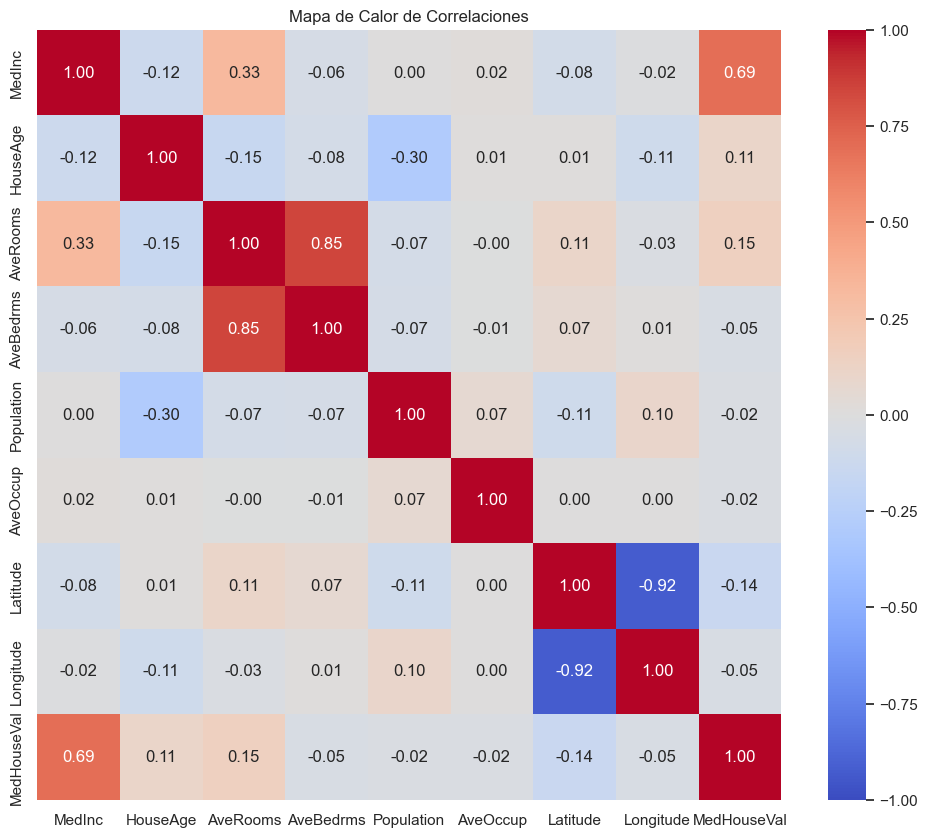

In [67]:
# Matriz de correlación
correlation_matrix = df_california.corr()

# Correlación entre los atributos y el target
print(correlation_matrix['MedHouseVal'])

# Mapa de calor para visualizar correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

El atributo que tiene mayor correlación con el target es MedInc.

Los atributos AveRooms y AveBedrms están correlacionados entre sí. También, existe una fuerte correlación negativa entre los atributos Latitude y Longitude.

2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se 
observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin 
entrar en pruebas de hipótesis?

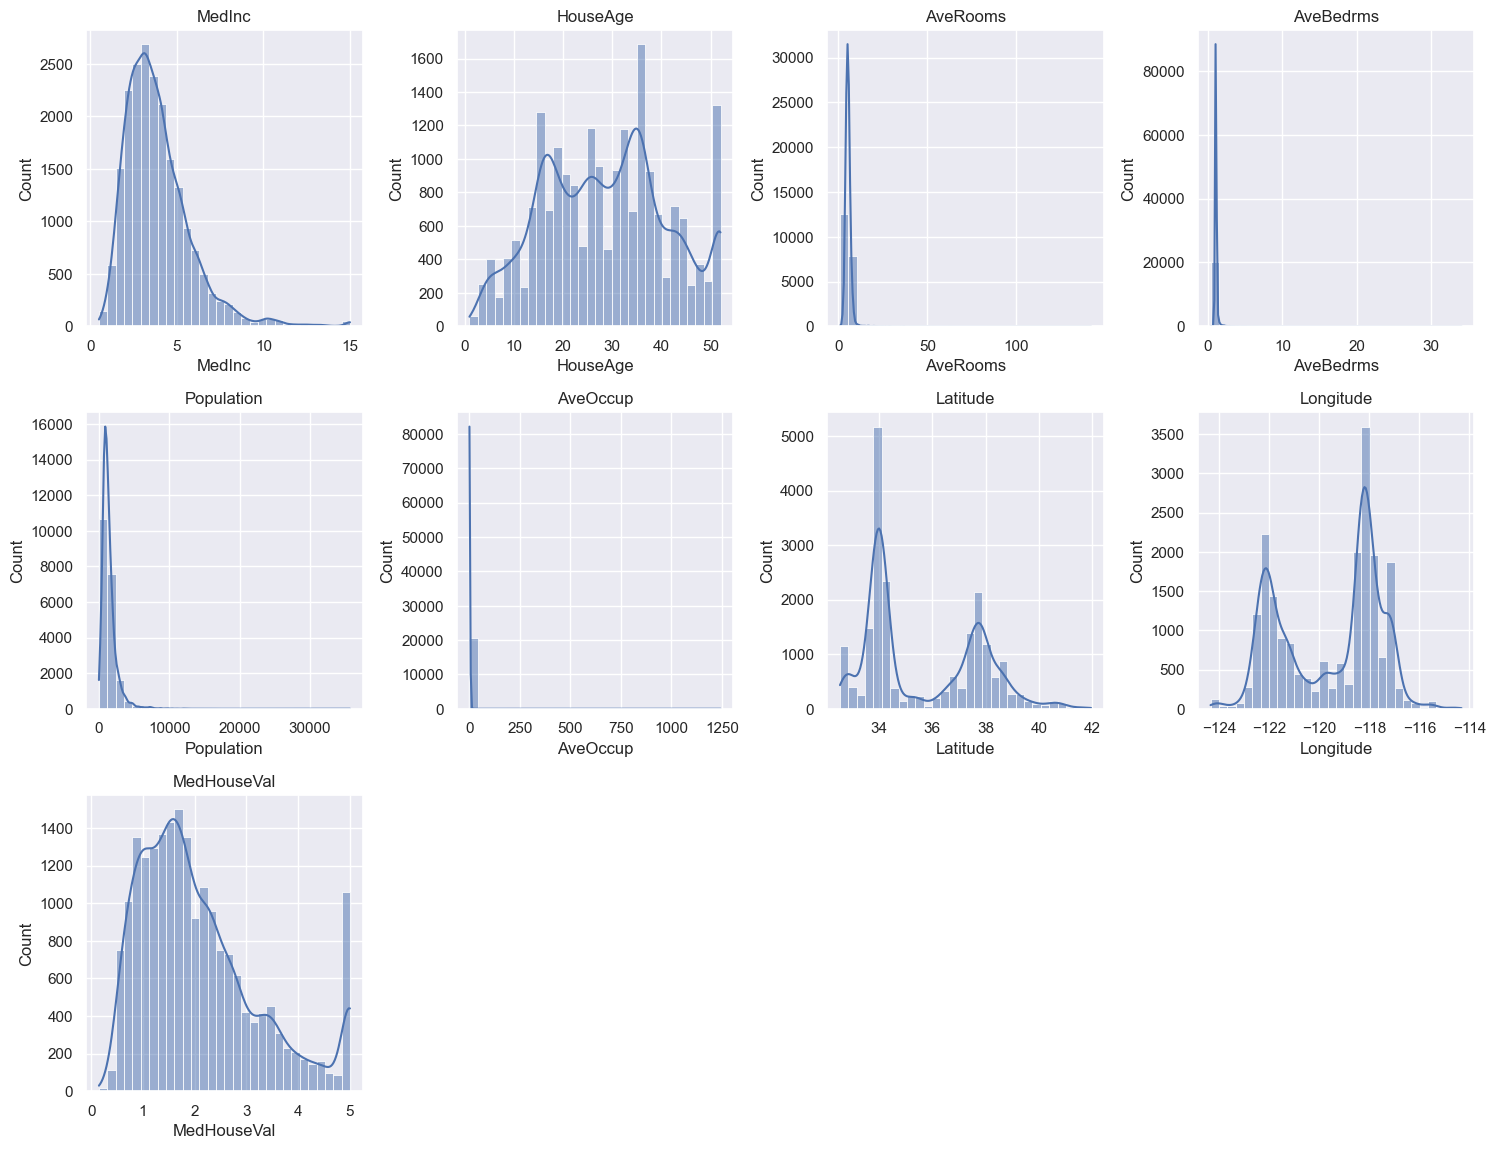

In [68]:
plt.figure(figsize=(15, 15))

# Histograma para cada atributo
for i, column in enumerate(df_california.columns):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(df_california[column], kde=True, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

Se observa que la distribución del atributo MedInc se asemeja a la distribución de MedHouseVal, confirmando la correlación entre estos dos atributos. Su distribucion esta sesgada a la derecha.

Asimismo, se confirma visulamente la correlación poitiva entre AveRooms y AveBedrms y la correlación negativa fuerte entre Latitude y Longitude. 

Respecto a los demás atributos, no existe distribuciones normales (forma de campana), más bien los atributos tienen una distribucion con sesgo a la derecha.

3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del 
modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su 
respuesta.

In [69]:
# Inicializar modelo de regresión lineal
linear_model = LinearRegression()

# Ajustamos el modelo con los datos de entrenamiento
linear_model.fit(X_train_scaled, y_train)

# Predicciones en el set de prueba
y_pred = linear_model.predict(X_test_scaled)

# Varianza total del target (varianza en los datos de prueba)
total_variance = np.var(y_test, ddof=0)

# Varianza explicada por el modelo (varianza explicada en los datos de prueba)
explained_variance = np.var(y_test - y_pred, ddof=0)

# Coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Error cuadrático medio (MSE) para referencia
mse = mean_squared_error(y_test, y_pred)

print(f"Varianza total del target: {total_variance:.2f}")
print(f"Varianza explicada por el modelo: {total_variance - explained_variance:.2f}")
print(f"Coeficiente de determinación R^2: {r2:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")

Varianza total del target: 1.31
Varianza explicada por el modelo: 0.78
Coeficiente de determinación R^2: 0.60
Error cuadrático medio (MSE): 0.53


El modelo está capturando razonablemente el comportamiento del target ya que r2 tiene un valor de 0.60 y es mayor a r2.

4. Calcular las métricas de MSE, MAE y $R^2$ del set de evaluación.

In [70]:
# Ajustar modelo de regresión lineal con el conjunto de entrenamiento
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de evaluación
y_pred = linear_model.predict(X_test_scaled)

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación R^2: {r2:.2f}")

Error Cuadrático Medio (MSE): 0.53
Error Absoluto Medio (MAE): 0.53
Coeficiente de Determinación R^2: 0.60


Un $R^2$ de 0.60 significa que el modelo explica el 60% de la varianza en el valor medio de las casas.

El MSE y MAE idénticos pueden sugerir que existe una distribución de errores bastante uniforme o que las diferencias entre predicciones y valores reales son consistentes.

5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el 
mejor valor de $\alpha$, buscando entre [0, 12.5]. Graficar el valor de MSE versus $\alpha$.

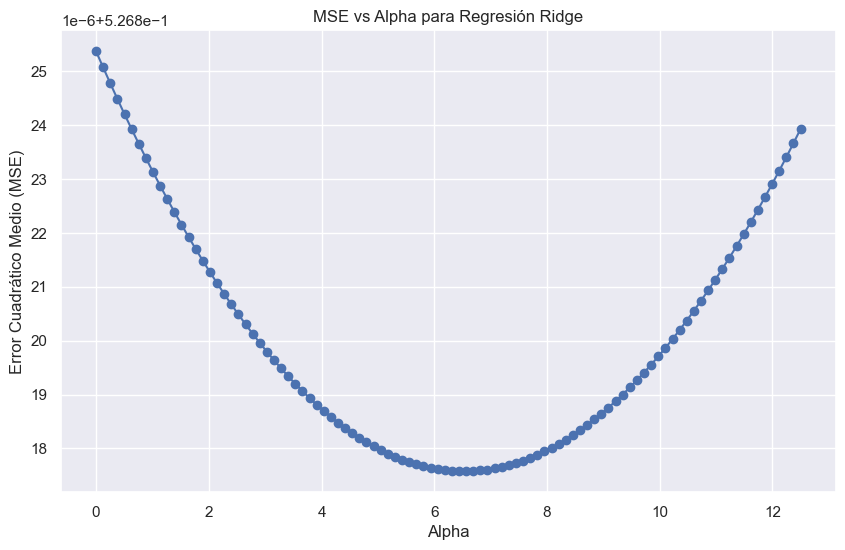

El mejor valor de alpha es: 6.57


In [71]:
# Rango de valores para alpha
alpha_values = np.linspace(0, 12.5, 100)

mse_scores = []

# Iterar sobre cada valor de alpha
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    # Validación cruzada y cálculo del MSE promedio
    cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, 
                                scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-cv_scores.mean())

# MSE versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_scores, marker='o')
plt.title('MSE vs Alpha para Regresión Ridge')
plt.xlabel('Alpha')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.grid(True)
plt.show()

# Mejor valor de alpha
best_alpha = alpha_values[np.argmin(mse_scores)]
print(f"El mejor valor de alpha es: {best_alpha:.2f}")

$\alpha$=6.57 es el valor que minimiza el error cuadrático medio MSE durante la validación cruzada, lo que indica que es el valor que proporciona el mejor rendimiento del modelo en términos de precision en el conjunto de datos de prueba.

6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. 
¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse 
reducido?

In [92]:
# Inicializar modelos
linear_model = LinearRegression()
ridge_model = Ridge(alpha=6.57)

# Ajustar modelos con los datos de entrenamiento
linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de evaluación
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Métricas para la regresión lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Métricas para la regresión Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Imprimimos los resultados
print(f"Regresión Lineal - MSE: {mse_linear:.5f}, MAE: {mae_linear:.5f}")
print(f"Regresión Ridge (α=6.57) - MSE: {mse_ridge:.5f}, MAE: {mae_ridge:.5f}")

Regresión Lineal - MSE: 0.53057, MAE: 0.52725
Regresión Ridge (α=6.57) - MSE: 0.53041, MAE: 0.52722


La regresión Ridge (con $\alpha$=6.57) da resultados ligeramente mejores en comparación con la regresión lineal en términos de ambas métricas: MSE y MAE. Aunque las diferencias son pequeñas, la regresión Ridge tiene un MSE y MAE marginalmente más bajos.

La regresión Ridge ha reducido la magnitud de los errores de predicción en comparación con la regresión lineal. Específicamente, ha ayudado a reducir el error cuadrático medio al evitar que el modelo se ajuste demasiado a las variaciones en el conjunto de datos de entrenamiento, lo que puede ser una forma de mejorar la capacidad de generalización del modelo.

En resumen, aunque la mejora en las métricas es pequeña, la regresión Ridge ha demostrado ser ligeramente mejor, lo cual es consistente con el propósito de la regularización para mejorar la generalización y reducir el sobreajuste.